# The Sparks Foundation
## Data Science and Business Analytics

## TASK-3 Unsupervised Learning (Clutering of Iris Dataset)
### Author - Aditya Naranje

### Importing required libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
mapping = {"Iris-setosa":"Setosa", 
           "Iris-versicolor":"Versicolor",
           "Iris-virginica":"Virginica"}

In [6]:
data["Species"] = data["Species"].map(mapping)

### Plotting histogram for visulization of data distribution.

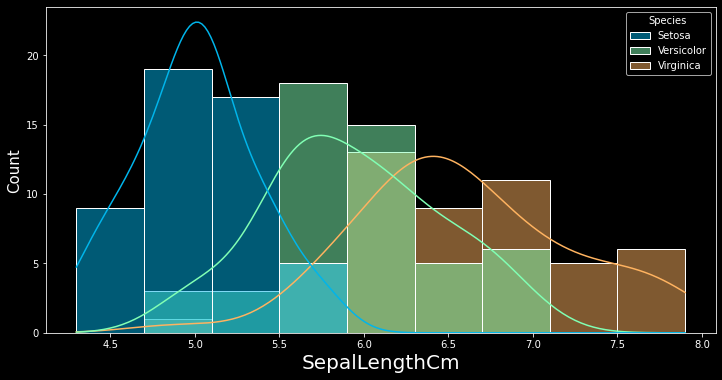

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['SepalLengthCm'],hue='Species',palette='rainbow',kde=True)
plt.xlabel("SepalLengthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

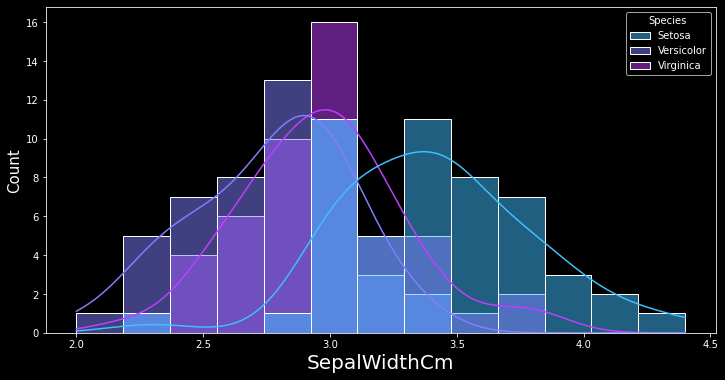

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['SepalWidthCm'],hue='Species',palette='cool',kde=True)
plt.xlabel("SepalWidthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

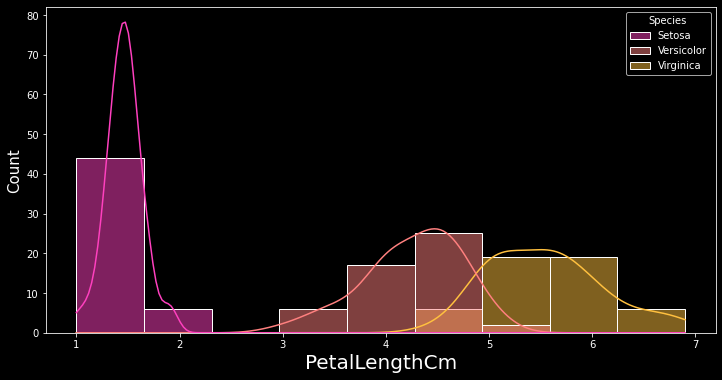

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['PetalLengthCm'],hue='Species',palette='spring',kde=True)
plt.xlabel("PetalLengthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

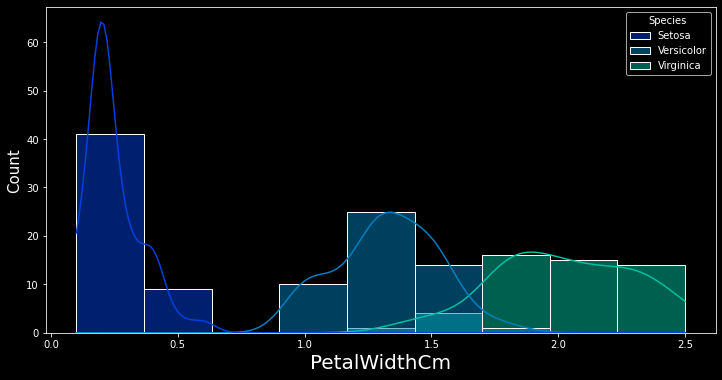

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['PetalWidthCm'],hue='Species',palette='winter',kde=True)
plt.xlabel("PetalWidthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

### Scatterplot.

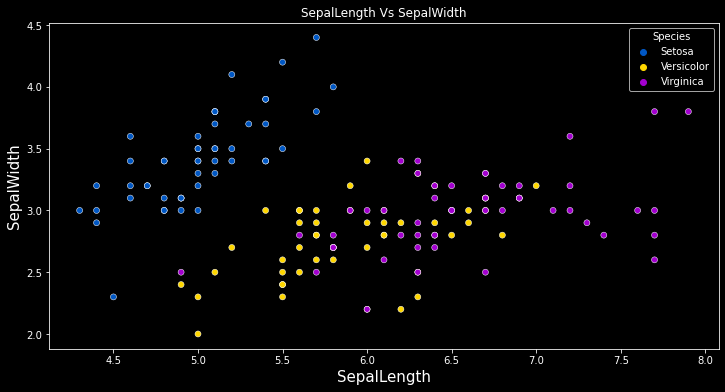

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["SepalLengthCm"] ,data['SepalWidthCm'],hue=data['Species'],palette="prism")
plt.title("SepalLength Vs SepalWidth")
plt.xlabel("SepalLength",fontsize=15)
plt.ylabel("SepalWidth",fontsize=15)
plt.show()

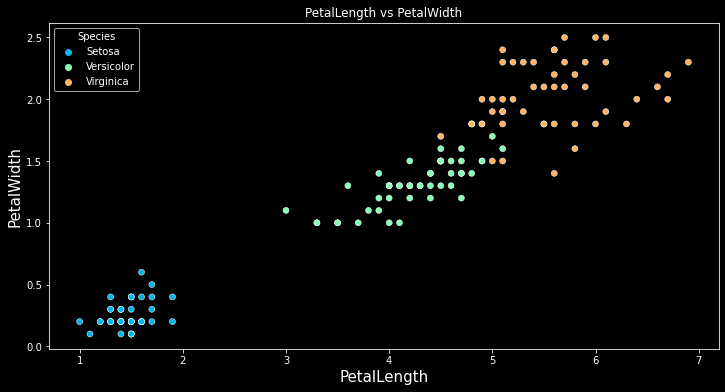

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["PetalLengthCm"] ,data['PetalWidthCm'],hue=data['Species'],palette="rainbow")
plt.title("PetalLength vs PetalWidth")
plt.xlabel("PetalLength",fontsize=15)
plt.ylabel("PetalWidth",fontsize=15)
plt.show()

### Boxplot.

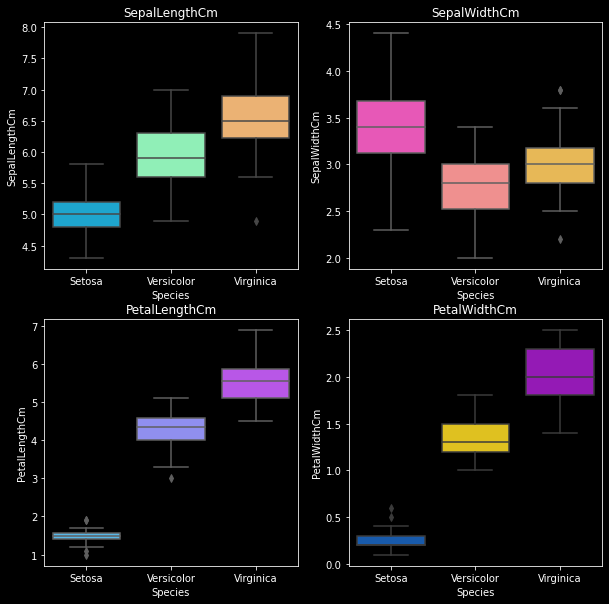

In [13]:
c = 1
colors = ["rainbow","spring","cool","prism"]
x = 0
plt.figure(figsize=(10,10))
for i in data.columns:
    if i!="Species" and i!="Id":
        plt.subplot(2,2,c)
        #sns.boxplot(data[i],color=colors[x%6],)
        sns.boxplot('Species', i, data=data,palette=colors[x%4])
        plt.title(i)
        x = x+1
        c = c+1

## Heatmap.

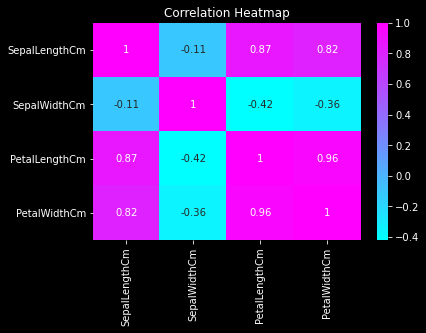

In [14]:
df = data.drop(columns=["Id"])
sns.heatmap(df.corr(), annot=True,cmap="cool")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X = data.drop(columns=["Id","Species"])

In [16]:
from sklearn.cluster import KMeans

### Using elbow method to get number of  clusters required.

In [17]:
sse = []
for cluster in range(1,10):
    km = KMeans(n_clusters=cluster)
    km.fit(X)
    sse.append(km.inertia_)
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':sse})

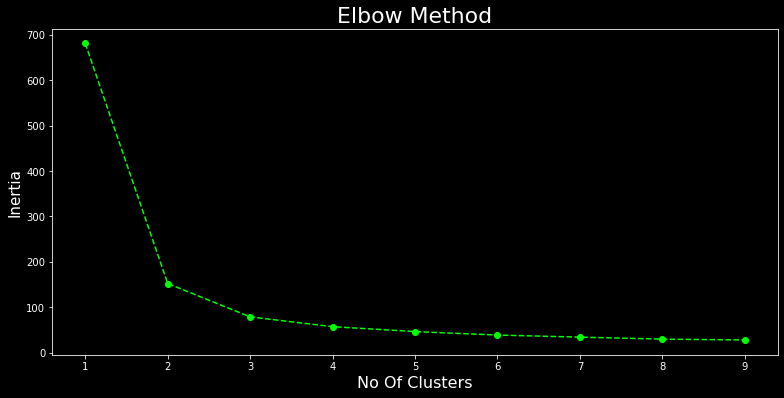

In [18]:
plt.figure(figsize = (13,6))
plt.plot(frame['Cluster'],frame['SSE'],color = 'lime' ,linestyle = '--',marker='o')
plt.title("Elbow Method",fontsize=22)
plt.xlabel('No Of Clusters',fontsize=16)
plt.ylabel('Inertia',fontsize=15)
plt.show()

In [19]:
km = KMeans(n_clusters=3)
km.fit(X)
pred = km.predict(X)

In [20]:
X["cluster"] = pred

In [21]:
def index(x,y):
    if x =="SepalLengthCm":
        a = 0
    elif x=="SepalWidthCm":
        a = 1
    elif x=="PetalLengthCm":
        a = 2
    else:
        a = 3
    if y =="SepalLengthCm":
        b = 0
    elif y=="SepalWidthCm":
        b = 1
    elif y=="PetalLengthCm":
        b = 2
    else:
        b = 3
    return a,b

In [22]:
c1 = ["blue","darkcyan","purple","lightblue","indigo"]
c2 = ["darkorange","darkred","red","chocolate","tomato"]
c3 = ["dodgerblue","thistle","silver","gold","ghostwhite"]
def plot(str_x,str_y,clusters):
    p = np.random.randint(0,5)
    q = np.random.randint(0,5)
    r = np.random.randint(0,5)
    colors[0] = c1[p]
    colors[1] = c2[q]
    colors[2] = c3[r]
    k = 0
    x = []
    y = []
    centers = km.cluster_centers_
    for i in range(clusters):
        x.append(X[str_x][X['cluster']==i])
        y.append(X[str_y][X['cluster']==i])
    plt.figure(figsize = (8,5))
    a,b = index(str_x,str_y)
    for i in range(clusters):
        plt.scatter(x[i], y[i], label = 'cluster {}'.format(i+1),color=colors[k%3])
        k = k+1
    plt.scatter(centers[:,a], centers[:,b], marker="x", color='lime',s=60,label="Centroids")
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(str(str_x+" VS "+str_y))
    plt.legend()
    plt.show()

### Plotting clusters using KMeans clustering for different features.

## Clustering using SepalLength and SepalWidth.

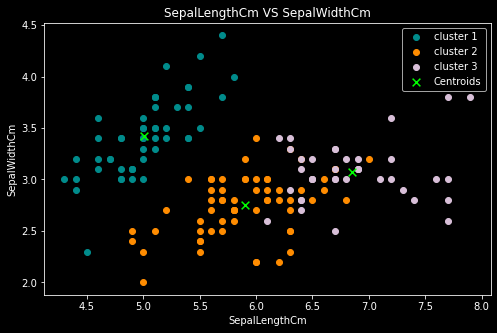

In [23]:
plot("SepalLengthCm","SepalWidthCm",3)

## Clustering using PetalLength and PetalWidth.

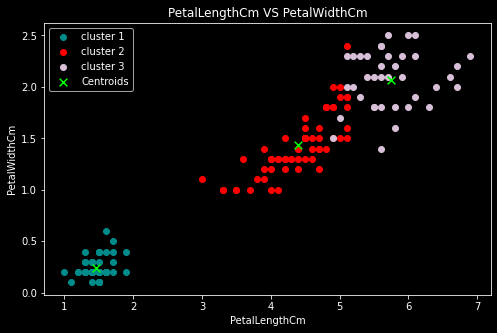

In [24]:
plot("PetalLengthCm","PetalWidthCm",3)

## Clustering using SepalLength and PetalLength.

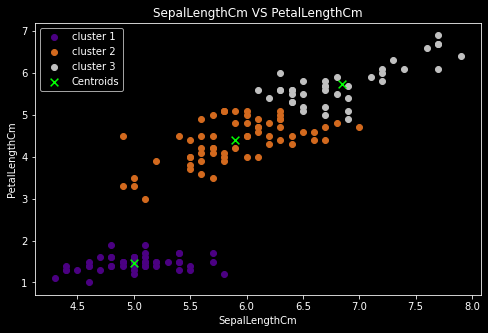

In [25]:
plot("SepalLengthCm","PetalLengthCm",3)

## Clustering using SepalWidth and PetalWidth.

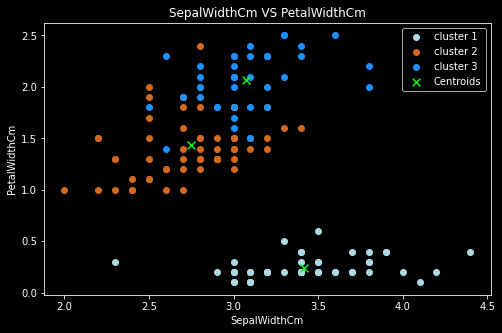

In [26]:
plot("SepalWidthCm","PetalWidthCm",3)